# Example using MEGNet with Molecules
This example shows how to use MEGNet with molecular data. It will require that you have installed MEGNet with the extra depedencies for molecules, as described in the documentation.

## Load data
Our first step is to load a subset of the QM9 dataset that we provide for demonstration purposes. 
The dataset contains the XYZ coordinates and atomization energies for each molecule.

In [30]:
import tensorflow as tf
import pandas as pd

In [31]:
data = pd.read_json('molecules.json').sample(1000)

In [3]:
data

,xyz,u0_atom
104951,20\nH11 C6 N1 O2\nC -0.040212 1.582397 -0.2086...,-2.937135
112398,19\nH10 C5 N2 O2\nC 0.150811 1.183390 0.145578...,-2.819816
74991,20\nH11 C6 N3\nC -0.852184 1.497185 0.088267\n...,-2.986986
120695,16\nH7 C4 N5\nC -0.076362 1.538767 -0.275771\n...,-2.374315
2444,13\nH6 C4 N2 O1\nC -0.225554 1.392255 -0.03748...,-2.011048
...,...,...
76525,22\nH13 C8 N1\nC -0.116967 1.616640 -0.100810\...,-3.269955
35963,17\nH8 C6 N2 O1\nC -0.002422 1.523623 -0.01545...,-2.549969
113628,23\nH14 C7 O2\nC 0.286399 1.304044 0.363566\nO...,-3.380323
46898,17\nH8 C5 N2 O2\nN 0.140557 1.288108 0.147585\...,-2.602274


We need to convert the XYZ files (stored as strings) to an OpenBabel data object before using the data to train MEGNet

In [32]:
# import pybel
from openbabel import pybel
structures = [pybel.readstring('xyz', x) for x in data['xyz']]

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H5 C5 N1 O2)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H8 C5 N4)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H10 C6 N2 O1)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H5 C5 N1 O3)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H7 C5 N3 O1)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H6 C4 N2 O1)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is H7 C5 N3 O1)



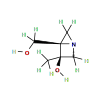

In [5]:
structures[0]

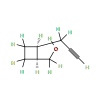

In [18]:
structures[8]

In [33]:
targets = data['u0_atom'].tolist()  # Atomization energy computed with B3LYP DFT

In [19]:
len(structures)

1000

In [27]:
type(structures[0])

openbabel.pybel.Molecule

## Set Up and Train Model
Here, we set up the MEGNet to use the MolecularGraph representation to compute the connectivity of the molecule and the features for each atom and bond. We do use the default settings for the MolecularGraph calculator

In [34]:
from megnet.data.molecule import MolecularGraph
from megnet.models import MEGNetModel

model = MEGNetModel(27, 2, 27, nblocks=1, lr=1e-2,
                    n1=4, n2=4, n3=4, npass=1, ntarget=1,
                    graph_converter=MolecularGraph())

The model training tool will generate the graph representations of each molecule first, and the train the neural network

In [35]:
mg = MolecularGraph()

In [36]:
%%time
model.train(structures, targets, epochs=100, verbose=0)

[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:57:42] Explicit valence for atom # 3 C, 5, is g

CPU times: user 26.5 s, sys: 1.95 s, total: 28.5 s
Wall time: 22 s


# Prediction
Use the ML model to predict the atomization of each model. We are both using an unconverged network and the training set molecules because this intended to demonstrate 

In [40]:
predicted_atom = [model.predict_structure(x) for x in structures]

[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[19:58:43] Explicit valence for atom # 3 C, 5, is g

Make a predicted vs actual plot

In [41]:
from matplotlib import pyplot as plt

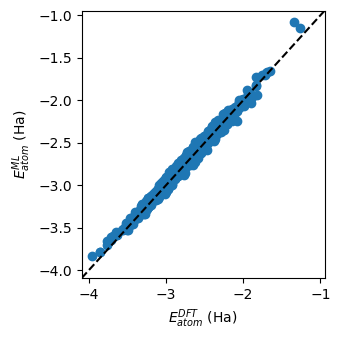

In [42]:
fig, ax = plt.subplots()

ax.scatter(targets, predicted_atom)

# Add the y=x line
lim = [min(ax.get_xlim() + ax.get_ylim()), max(ax.get_xlim() + ax.get_ylim())]
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim, lim, 'k--')

ax.set_xlabel('$E_{atom}^{DFT}$ (Ha)')
ax.set_ylabel('$E_{atom}^{ML}$ (Ha)')

fig.set_size_inches(3.5, 3.5)
fig.tight_layout()

In [43]:
predicted_atom

[array([-1.9895595], dtype=float32),
 array([-2.632057], dtype=float32),
 array([-2.4631314], dtype=float32),
 array([-2.8550985], dtype=float32),
 array([-3.3956642], dtype=float32),
 array([-3.2793], dtype=float32),
 array([-3.5852373], dtype=float32),
 array([-2.7636094], dtype=float32),
 array([-1.7021736], dtype=float32),
 array([-2.6991975], dtype=float32),
 array([-2.7627866], dtype=float32),
 array([-3.118052], dtype=float32),
 array([-2.8473303], dtype=float32),
 array([-2.989526], dtype=float32),
 array([-2.2648113], dtype=float32),
 array([-3.1444895], dtype=float32),
 array([-2.591099], dtype=float32),
 array([-2.5122998], dtype=float32),
 array([-2.9832363], dtype=float32),
 array([-3.524678], dtype=float32),
 array([-3.0206456], dtype=float32),
 array([-2.937503], dtype=float32),
 array([-2.595264], dtype=float32),
 array([-2.9087515], dtype=float32),
 array([-1.1482155], dtype=float32),
 array([-3.2492223], dtype=float32),
 array([-2.2273564], dtype=float32),
 array([-2.

In [14]:
targets

[-2.937135,
 -2.819816,
 -2.986986,
 -2.374315,
 -2.011048,
 -2.135464,
 -3.045975,
 -2.76028,
 -3.196543,
 -2.193052,
 -3.018491,
 -2.292415,
 -3.062537,
 -3.263469,
 -2.548026,
 -3.339982,
 -2.444851,
 -2.251955,
 -2.494592,
 -2.276696,
 -2.85319,
 -2.837376,
 -2.703539,
 -3.088809,
 -2.29523,
 -2.998661,
 -2.650705,
 -2.910091,
 -2.818042,
 -2.4447039999999998,
 -2.1422309999999998,
 -2.338976,
 -3.038071,
 -2.513327,
 -2.16872,
 -3.120236,
 -2.808431,
 -2.5087479999999998,
 -2.499231,
 -2.558297,
 -2.03409,
 -2.8609400000000003,
 -2.819914,
 -2.855077,
 -2.450445,
 -2.129637,
 -2.568126,
 -3.119053,
 -3.086837,
 -2.160894,
 -3.028677,
 -3.432392,
 -3.061271,
 -2.660496,
 -2.027593,
 -2.9982759999999997,
 -2.9552300000000002,
 -2.740291,
 -2.401496,
 -2.731792,
 -2.733658,
 -3.034521,
 -2.525536,
 -2.781316,
 -3.402518,
 -3.060226,
 -2.627075,
 -2.6349929999999997,
 -2.648255,
 -2.555555,
 -2.334512,
 -3.225908,
 -3.199045,
 -3.165726,
 -3.511307,
 -2.941492,
 -2.645258,
 -2.828281,

The network does not perform well, which is unsurprising given the small amount of training data and small number of epochs. 